In [1]:
import os
from torch.utils.data import Dataset, DataLoader, ConcatDataset
from skimage import io, transform
from torchvision import transforms, utils
import torch
import numpy as np
import nibabel as nib
from random import randint
from PIL import Image
import torch.optim as optim
import time
import QuickNAT as QN
import torch.nn as nn
from my_Dataset import TrainDataset

In [2]:
gpu_id = 0
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = str(gpu_id)

device = torch.device('cuda')
print(device)

cuda


In [3]:
sub_idx = 0
slice_idx = 1
T1a_dir = '/home/xiaoyu/MRIdata_group/T1w/axial/sub{}/slice{}'.format(sub_idx,slice_idx)
parc1a_dir = '/home/xiaoyu/MRIdata_group/parc_1/axial/sub{}/slice{}'.format(sub_idx,slice_idx)
total_data_0 = TrainDataset(T1a_dir=T1a_dir, parc1a_dir = parc1a_dir)

In [4]:
for sub_idx in range(1,330):
    T1a_dir = '/home/xiaoyu/MRIdata_group/T1w/axial/sub{}/slice{}'.format(sub_idx,slice_idx)
    parc1a_dir = '/home/xiaoyu/MRIdata_group/parc_1/axial/sub{}/slice{}'.format(sub_idx,slice_idx)
    train_data = TrainDataset(T1a_dir=T1a_dir, parc1a_dir = parc1a_dir)
    total_data_0 = total_data_0 + train_data
print(len(total_data_0))

3300


In [5]:
dataloader_0 = DataLoader(total_data_0, batch_size = 10, shuffle = True, num_workers = 4)
print(len(dataloader_0))

330


In [6]:
my_lr = 0.001
start=time.time()
model = QN.QuickNAT(1,64,178)
model = model.to(device)
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters() ,lr = my_lr)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1)

In [ ]:
for epoch in range(0,50):
    running_loss = 0
    num_batches = 0
    scheduler.step()
    for i_batch, sample_batched in enumerate(dataloader_0):
    
        optimizer.zero_grad()
        
        #get the inputs
        inputs, labels = sample_batched['T1a'], sample_batched['parc1a']
        

        inputs = inputs.to(device)
        labels = labels.to(device)

        inputs.requires_grad_()
        
        #forward + backward +optimize
        scores = model(inputs)

          
        # Define the loss
        loss = criterion(scores, labels.long()) 
        loss.backward()
        optimizer.step()
        
        # compute and accumulate stats
        running_loss += loss.detach().item()
       
        num_batches+=1 
           
        
    # AVERAGE STATS THEN DISPLAY    
    total_loss = running_loss/num_batches
    
   
    elapsed = (time.time()-start)/60
        
    print('epoch=',epoch, '\t time=', elapsed,'min', '\t loss=', total_loss ) 
 
print('Finish Training')

epoch= 0 	 time= 1.1599755883216858 min 	 loss= 0.27669922068263547
epoch= 1 	 time= 2.263407369454702 min 	 loss= 0.11193209940736944
epoch= 2 	 time= 3.371807416280111 min 	 loss= 0.10968003860025695
epoch= 3 	 time= 4.474303146203359 min 	 loss= 0.108245948465033
epoch= 4 	 time= 5.587028423945109 min 	 loss= 0.10562602397844648


In [8]:
def show_mask(image, mask):
    """
    Show image and mask
    Args:
        image(numpyarray): The training image
        semantic(numpyarray): The training image segmentation
    """    
    plt.subplot(1,2,1)
    plt.title('image')
    plt.imshow(image)
    plt.subplot(1,2,2)
    plt.title('mask')
    plt.imshow(mask)
    plt.show()

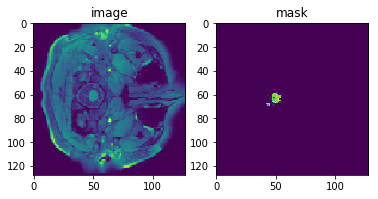

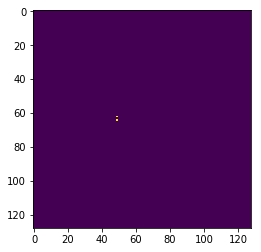

In [13]:
import matplotlib.pyplot as plt
sample=total_data_0[0]
img = sample['T1a']
mask = sample['parc1a']

show_mask(img.squeeze(), mask)

img = img.unsqueeze(dim = 0)

img = img.to(device)


# feed it to network
scores =  model(img)
scores = scores.detach().cpu().squeeze().permute(1,2,0)

scores = torch.exp(scores)

a,b = torch.max(scores,dim=2)
plt.imshow(b)

### slice1

In [ ]:
sub_idx = 0
slice_idx = 1
T1a_dir = '/home/xiaoyu/MRIdata_group/T1w/axial/sub{}/slice{}'.format(sub_idx,slice_idx)
parc1a_dir = '/home/xiaoyu/MRIdata_group/parc_1/axial/sub{}/slice{}'.format(sub_idx,slice_idx)
total_data_1 = TrainDataset(T1a_dir=T1a_dir, parc1a_dir = parc1a_dir)

In [ ]:
for sub_idx in range(1,330):
    T1a_dir = '/home/xiaoyu/MRIdata_group/T1w/axial/sub{}/slice{}'.format(sub_idx,slice_idx)
    parc1a_dir = '/home/xiaoyu/MRIdata_group/parc_1/axial/sub{}/slice{}'.format(sub_idx,slice_idx)
    train_data = TrainDataset(T1a_dir=T1a_dir, parc1a_dir = parc1a_dir)
    total_data_1 = total_data_1 + train_data
print(len(total_data_1))
dataloader_1 = DataLoader(total_data_1, batch_size = 50, shuffle = True, num_workers = 4)

In [ ]:
for epoch in range(0,50):
    logs = {}
    running_loss = 0
    num_batches = 0
    for i_batch, sample_batched in enumerate(dataloader_1):
    
        optimizer.zero_grad()
        
        #get the inputs
        inputs, labels = sample_batched['T1a'], sample_batched['parc1a']
        

        inputs = inputs.to(device)
        labels = labels.to(device)

        inputs.requires_grad_()
        
        #forward + backward +optimize
        scores = model(inputs)

          
        # Define the loss
        loss = criterion(scores, labels.long()) 
        loss.backward()
        optimizer.step()
        
        # compute and accumulate stats
        running_loss += loss.detach().item()
       
        num_batches+=1 
        
        
    # AVERAGE STATS THEN DISPLAY    
    total_loss = running_loss/num_batches
   
    elapsed = (time.time()-start)/60
        
    print('epoch=',epoch, '\t time=', elapsed,'min', '\t loss=', total_loss )
   
 
print('Finish Training')    

### Slice2

In [ ]:
sub_idx = 0
slice_idx = 2
T1a_dir = '/home/xiaoyu/MRIdata_group/T1w/axial/sub{}/slice{}'.format(sub_idx,slice_idx)
parc1a_dir = '/home/xiaoyu/MRIdata_group/parc_1/axial/sub{}/slice{}'.format(sub_idx,slice_idx)
total_data_2 = TrainDataset(T1a_dir=T1a_dir, parc1a_dir = parc1a_dir)

for sub_idx in range(1,330):
    T1a_dir = '/home/xiaoyu/MRIdata_group/T1w/axial/sub{}/slice{}'.format(sub_idx,slice_idx)
    parc1a_dir = '/home/xiaoyu/MRIdata_group/parc_1/axial/sub{}/slice{}'.format(sub_idx,slice_idx)
    train_data = TrainDataset(T1a_dir=T1a_dir, parc1a_dir = parc1a_dir)
    total_data_2 = total_data_2 + train_data
print(len(total_data_2))
dataloader_2 = DataLoader(total_data_2, batch_size = 50, shuffle = True, num_workers = 4)

In [ ]:
for epoch in range(0,50):
    logs = {}
    running_loss = 0
    num_batches = 0
    for i_batch, sample_batched in enumerate(dataloader_2):
    
        optimizer.zero_grad()
        
        #get the inputs
        inputs, labels = sample_batched['T1a'], sample_batched['parc1a']
        

        inputs = inputs.to(device)
        labels = labels.to(device)

        inputs.requires_grad_()
        
        #forward + backward +optimize
        scores = model(inputs)

          
        # Define the loss
        loss = criterion(scores, labels.long()) 
        loss.backward()
        optimizer.step()
        
        # compute and accumulate stats
        running_loss += loss.detach().item()
       
        num_batches+=1 
        
        
    # AVERAGE STATS THEN DISPLAY    
    total_loss = running_loss/num_batches
   
    elapsed = (time.time()-start)/60
        
    print('epoch=',epoch, '\t time=', elapsed,'min', '\t loss=', total_loss )
   
 
print('Finish Training')    

### Slice3

In [ ]:
sub_idx = 0
slice_idx = 3
T1a_dir = '/home/xiaoyu/MRIdata_group/T1w/axial/sub{}/slice{}'.format(sub_idx,slice_idx)
parc1a_dir = '/home/xiaoyu/MRIdata_group/parc_1/axial/sub{}/slice{}'.format(sub_idx,slice_idx)
total_data_3 = TrainDataset(T1a_dir=T1a_dir, parc1a_dir = parc1a_dir)

for sub_idx in range(1,330):
    T1a_dir = '/home/xiaoyu/MRIdata_group/T1w/axial/sub{}/slice{}'.format(sub_idx,slice_idx)
    parc1a_dir = '/home/xiaoyu/MRIdata_group/parc_1/axial/sub{}/slice{}'.format(sub_idx,slice_idx)
    train_data = TrainDataset(T1a_dir=T1a_dir, parc1a_dir = parc1a_dir)
    total_data_3 = total_data_3 + train_data
print(len(total_data_3))
dataloader_3 = DataLoader(total_data_3, batch_size = 50, shuffle = True, num_workers = 4)

In [ ]:
for epoch in range(0,50):
    logs = {}
    running_loss = 0
    num_batches = 0
    for i_batch, sample_batched in enumerate(dataloader_3):
    
        optimizer.zero_grad()
        
        #get the inputs
        inputs, labels = sample_batched['T1a'], sample_batched['parc1a']
        

        inputs = inputs.to(device)
        labels = labels.to(device)

        inputs.requires_grad_()
        
        #forward + backward +optimize
        scores = model(inputs)

          
        # Define the loss
        loss = criterion(scores, labels.long()) 
        loss.backward()
        optimizer.step()
        
        # compute and accumulate stats
        running_loss += loss.detach().item()
       
        num_batches+=1 
        
        
    # AVERAGE STATS THEN DISPLAY    
    total_loss = running_loss/num_batches
   
    elapsed = (time.time()-start)/60
        
    print('epoch=',epoch, '\t time=', elapsed,'min', '\t loss=', total_loss )
   
 
print('Finish Training')    

### Slice4

In [ ]:
sub_idx = 0
slice_idx = 4
T1a_dir = '/home/xiaoyu/MRIdata_group/T1w/axial/sub{}/slice{}'.format(sub_idx,slice_idx)
parc1a_dir = '/home/xiaoyu/MRIdata_group/parc_1/axial/sub{}/slice{}'.format(sub_idx,slice_idx)
total_data_4 = TrainDataset(T1a_dir=T1a_dir, parc1a_dir = parc1a_dir)

for sub_idx in range(1,330):
    T1a_dir = '/home/xiaoyu/MRIdata_group/T1w/axial/sub{}/slice{}'.format(sub_idx,slice_idx)
    parc1a_dir = '/home/xiaoyu/MRIdata_group/parc_1/axial/sub{}/slice{}'.format(sub_idx,slice_idx)
    train_data = TrainDataset(T1a_dir=T1a_dir, parc1a_dir = parc1a_dir)
    total_data_4 = total_data_4 + train_data
print(len(total_data_4))
dataloader_4 = DataLoader(total_data_4, batch_size = 50, shuffle = True, num_workers = 4)

In [ ]:
for epoch in range(0,50):
    logs = {}
    running_loss = 0
    num_batches = 0
    for i_batch, sample_batched in enumerate(dataloader_4):
    
        optimizer.zero_grad()
        
        #get the inputs
        inputs, labels = sample_batched['T1a'], sample_batched['parc1a']
        

        inputs = inputs.to(device)
        labels = labels.to(device)

        inputs.requires_grad_()
        
        #forward + backward +optimize
        scores = model(inputs)

          
        # Define the loss
        loss = criterion(scores, labels.long()) 
        loss.backward()
        optimizer.step()
        
        # compute and accumulate stats
        running_loss += loss.detach().item()
       
        num_batches+=1 
        
        
    # AVERAGE STATS THEN DISPLAY    
    total_loss = running_loss/num_batches
   
    elapsed = (time.time()-start)/60
        
    print('epoch=',epoch, '\t time=', elapsed,'min', '\t loss=', total_loss )
   
 
print('Finish Training')    

In [ ]:
### Slice5

In [ ]:
sub_idx = 0
slice_idx = 5
T1a_dir = '/home/xiaoyu/MRIdata_group/T1w/axial/sub{}/slice{}'.format(sub_idx,slice_idx)
parc1a_dir = '/home/xiaoyu/MRIdata_group/parc_1/axial/sub{}/slice{}'.format(sub_idx,slice_idx)
total_data_5 = TrainDataset(T1a_dir=T1a_dir, parc1a_dir = parc1a_dir)

for sub_idx in range(1,330):
    T1a_dir = '/home/xiaoyu/MRIdata_group/T1w/axial/sub{}/slice{}'.format(sub_idx,slice_idx)
    parc1a_dir = '/home/xiaoyu/MRIdata_group/parc_1/axial/sub{}/slice{}'.format(sub_idx,slice_idx)
    train_data = TrainDataset(T1a_dir=T1a_dir, parc1a_dir = parc1a_dir)
    total_data_5 = total_data_5 + train_data
print(len(total_data_5))
dataloader_5 = DataLoader(total_data_5, batch_size = 50, shuffle = True, num_workers = 4)

In [ ]:
for epoch in range(0,50):
    logs = {}
    running_loss = 0
    num_batches = 0
    for i_batch, sample_batched in enumerate(dataloader_5):
    
        optimizer.zero_grad()
        
        #get the inputs
        inputs, labels = sample_batched['T1a'], sample_batched['parc1a']
        

        inputs = inputs.to(device)
        labels = labels.to(device)

        inputs.requires_grad_()
        
        #forward + backward +optimize
        scores = model(inputs)

          
        # Define the loss
        loss = criterion(scores, labels.long()) 
        loss.backward()
        optimizer.step()
        
        # compute and accumulate stats
        running_loss += loss.detach().item()
       
        num_batches+=1 
        
        
    # AVERAGE STATS THEN DISPLAY    
    total_loss = running_loss/num_batches
   
    elapsed = (time.time()-start)/60
        
    print('epoch=',epoch, '\t time=', elapsed,'min', '\t loss=', total_loss )
   
 
print('Finish Training')    

### Slice6

In [ ]:
sub_idx = 0
slice_idx = 6
T1a_dir = '/home/xiaoyu/MRIdata_group/T1w/axial/sub{}/slice{}'.format(sub_idx,slice_idx)
parc1a_dir = '/home/xiaoyu/MRIdata_group/parc_1/axial/sub{}/slice{}'.format(sub_idx,slice_idx)
total_data_6 = TrainDataset(T1a_dir=T1a_dir, parc1a_dir = parc1a_dir)

for sub_idx in range(1,330):
    T1a_dir = '/home/xiaoyu/MRIdata_group/T1w/axial/sub{}/slice{}'.format(sub_idx,slice_idx)
    parc1a_dir = '/home/xiaoyu/MRIdata_group/parc_1/axial/sub{}/slice{}'.format(sub_idx,slice_idx)
    train_data = TrainDataset(T1a_dir=T1a_dir, parc1a_dir = parc1a_dir)
    total_data_6 = total_data_6 + train_data
print(len(total_data_6))
dataloader_6 = DataLoader(total_data_6, batch_size = 50, shuffle = True, num_workers = 4)

In [ ]:
for epoch in range(0,50):
    logs = {}
    running_loss = 0
    num_batches = 0
    for i_batch, sample_batched in enumerate(dataloader_6):
    
        optimizer.zero_grad()
        
        #get the inputs
        inputs, labels = sample_batched['T1a'], sample_batched['parc1a']
        

        inputs = inputs.to(device)
        labels = labels.to(device)

        inputs.requires_grad_()
        
        #forward + backward +optimize
        scores = model(inputs)

          
        # Define the loss
        loss = criterion(scores, labels.long()) 
        loss.backward()
        optimizer.step()
        
        # compute and accumulate stats
        running_loss += loss.detach().item()
       
        num_batches+=1 
        
        
    # AVERAGE STATS THEN DISPLAY    
    total_loss = running_loss/num_batches
   
    elapsed = (time.time()-start)/60
        
    print('epoch=',epoch, '\t time=', elapsed,'min', '\t loss=', total_loss )
   
 
print('Finish Training')    

In [ ]:
### Slice7

In [ ]:
sub_idx = 0
slice_idx = 7
T1a_dir = '/home/xiaoyu/MRIdata_group/T1w/axial/sub{}/slice{}'.format(sub_idx,slice_idx)
parc1a_dir = '/home/xiaoyu/MRIdata_group/parc_1/axial/sub{}/slice{}'.format(sub_idx,slice_idx)
total_data_7 = TrainDataset(T1a_dir=T1a_dir, parc1a_dir = parc1a_dir)

for sub_idx in range(1,330):
    T1a_dir = '/home/xiaoyu/MRIdata_group/T1w/axial/sub{}/slice{}'.format(sub_idx,slice_idx)
    parc1a_dir = '/home/xiaoyu/MRIdata_group/parc_1/axial/sub{}/slice{}'.format(sub_idx,slice_idx)
    train_data = TrainDataset(T1a_dir=T1a_dir, parc1a_dir = parc1a_dir)
    total_data_7 = total_data_7 + train_data
print(len(total_data_7))
dataloader_7 = DataLoader(total_data_7, batch_size = 50, shuffle = True, num_workers = 4)

In [ ]:
for epoch in range(0,50):
    logs = {}
    running_loss = 0
    num_batches = 0
    for i_batch, sample_batched in enumerate(dataloader_7):
    
        optimizer.zero_grad()
        
        #get the inputs
        inputs, labels = sample_batched['T1a'], sample_batched['parc1a']
        

        inputs = inputs.to(device)
        labels = labels.to(device)

        inputs.requires_grad_()
        
        #forward + backward +optimize
        scores = model(inputs)

          
        # Define the loss
        loss = criterion(scores, labels.long()) 
        loss.backward()
        optimizer.step()
        
        # compute and accumulate stats
        running_loss += loss.detach().item()
       
        num_batches+=1 
        
        
    # AVERAGE STATS THEN DISPLAY    
    total_loss = running_loss/num_batches
   
    elapsed = (time.time()-start)/60
        
    print('epoch=',epoch, '\t time=', elapsed,'min', '\t loss=', total_loss )
   
 
print('Finish Training')    

In [ ]:
### Slice8

In [ ]:
sub_idx = 0
slice_idx = 8
T1a_dir = '/home/xiaoyu/MRIdata_group/T1w/axial/sub{}/slice{}'.format(sub_idx,slice_idx)
parc1a_dir = '/home/xiaoyu/MRIdata_group/parc_1/axial/sub{}/slice{}'.format(sub_idx,slice_idx)
total_data_8 = TrainDataset(T1a_dir=T1a_dir, parc1a_dir = parc1a_dir)

for sub_idx in range(1,330):
    T1a_dir = '/home/xiaoyu/MRIdata_group/T1w/axial/sub{}/slice{}'.format(sub_idx,slice_idx)
    parc1a_dir = '/home/xiaoyu/MRIdata_group/parc_1/axial/sub{}/slice{}'.format(sub_idx,slice_idx)
    train_data = TrainDataset(T1a_dir=T1a_dir, parc1a_dir = parc1a_dir)
    total_data_8 = total_data_8 + train_data
print(len(total_data_8))
dataloader_8 = DataLoader(total_data_8, batch_size = 50, shuffle = True, num_workers = 4)

In [ ]:
for epoch in range(0,50):
    logs = {}
    running_loss = 0
    num_batches = 0
    for i_batch, sample_batched in enumerate(dataloader_8):
    
        optimizer.zero_grad()
        
        #get the inputs
        inputs, labels = sample_batched['T1a'], sample_batched['parc1a']
        

        inputs = inputs.to(device)
        labels = labels.to(device)

        inputs.requires_grad_()
        
        #forward + backward +optimize
        scores = model(inputs)

          
        # Define the loss
        loss = criterion(scores, labels.long()) 
        loss.backward()
        optimizer.step()
        
        # compute and accumulate stats
        running_loss += loss.detach().item()
       
        num_batches+=1 
        
        
    # AVERAGE STATS THEN DISPLAY    
    total_loss = running_loss/num_batches
   
    elapsed = (time.time()-start)/60
        
    print('epoch=',epoch, '\t time=', elapsed,'min', '\t loss=', total_loss )
   
 
print('Finish Training')    

In [ ]:
### Slice9

In [ ]:
sub_idx = 0
slice_idx = 9
T1a_dir = '/home/xiaoyu/MRIdata_group/T1w/axial/sub{}/slice{}'.format(sub_idx,slice_idx)
parc1a_dir = '/home/xiaoyu/MRIdata_group/parc_1/axial/sub{}/slice{}'.format(sub_idx,slice_idx)
total_data_9 = TrainDataset(T1a_dir=T1a_dir, parc1a_dir = parc1a_dir)

for sub_idx in range(1,330):
    T1a_dir = '/home/xiaoyu/MRIdata_group/T1w/axial/sub{}/slice{}'.format(sub_idx,slice_idx)
    parc1a_dir = '/home/xiaoyu/MRIdata_group/parc_1/axial/sub{}/slice{}'.format(sub_idx,slice_idx)
    train_data = TrainDataset(T1a_dir=T1a_dir, parc1a_dir = parc1a_dir)
    total_data_9 = total_data_9 + train_data
print(len(total_data_9))
dataloader_9 = DataLoader(total_data_9, batch_size = 50, shuffle = True, num_workers = 4)

In [ ]:
for epoch in range(0,50):
    logs = {}
    running_loss = 0
    num_batches = 0
    for i_batch, sample_batched in enumerate(dataloader_9):
    
        optimizer.zero_grad()
        
        #get the inputs
        inputs, labels = sample_batched['T1a'], sample_batched['parc1a']
        

        inputs = inputs.to(device)
        labels = labels.to(device)

        inputs.requires_grad_()
        
        #forward + backward +optimize
        scores = model(inputs)

          
        # Define the loss
        loss = criterion(scores, labels.long()) 
        loss.backward()
        optimizer.step()
        
        # compute and accumulate stats
        running_loss += loss.detach().item()
       
        num_batches+=1 
        
        
    # AVERAGE STATS THEN DISPLAY    
    total_loss = running_loss/num_batches
   
    elapsed = (time.time()-start)/60
        
    print('epoch=',epoch, '\t time=', elapsed,'min', '\t loss=', total_loss )
   
 
print('Finish Training')    

In [ ]:
### Slice10

In [ ]:
sub_idx = 0
slice_idx = 10
T1a_dir = '/home/xiaoyu/MRIdata_group/T1w/axial/sub{}/slice{}'.format(sub_idx,slice_idx)
parc1a_dir = '/home/xiaoyu/MRIdata_group/parc_1/axial/sub{}/slice{}'.format(sub_idx,slice_idx)
total_data_10 = TrainDataset(T1a_dir=T1a_dir, parc1a_dir = parc1a_dir)

for sub_idx in range(1,330):
    T1a_dir = '/home/xiaoyu/MRIdata_group/T1w/axial/sub{}/slice{}'.format(sub_idx,slice_idx)
    parc1a_dir = '/home/xiaoyu/MRIdata_group/parc_1/axial/sub{}/slice{}'.format(sub_idx,slice_idx)
    train_data = TrainDataset(T1a_dir=T1a_dir, parc1a_dir = parc1a_dir)
    total_data_10 = total_data_10 + train_data
print(len(total_data_10))
dataloader_10 = DataLoader(total_data_10, batch_size = 50, shuffle = True, num_workers = 4)

In [ ]:
for epoch in range(0,50):
    logs = {}
    running_loss = 0
    num_batches = 0
    for i_batch, sample_batched in enumerate(dataloader_10):
    
        optimizer.zero_grad()
        
        #get the inputs
        inputs, labels = sample_batched['T1a'], sample_batched['parc1a']
        

        inputs = inputs.to(device)
        labels = labels.to(device)

        inputs.requires_grad_()
        
        #forward + backward +optimize
        scores = model(inputs)

          
        # Define the loss
        loss = criterion(scores, labels.long()) 
        loss.backward()
        optimizer.step()
        
        # compute and accumulate stats
        running_loss += loss.detach().item()
       
        num_batches+=1 
        
        
    # AVERAGE STATS THEN DISPLAY    
    total_loss = running_loss/num_batches
   
    elapsed = (time.time()-start)/60
        
    print('epoch=',epoch, '\t time=', elapsed,'min', '\t loss=', total_loss )
   
 
print('Finish Training')    

In [ ]:
###Slice11

In [ ]:
sub_idx = 0
slice_idx = 11
T1a_dir = '/home/xiaoyu/MRIdata_group/T1w/axial/sub{}/slice{}'.format(sub_idx,slice_idx)
parc1a_dir = '/home/xiaoyu/MRIdata_group/parc_1/axial/sub{}/slice{}'.format(sub_idx,slice_idx)
total_data_11 = TrainDataset(T1a_dir=T1a_dir, parc1a_dir = parc1a_dir)

for sub_idx in range(1,330):
    T1a_dir = '/home/xiaoyu/MRIdata_group/T1w/axial/sub{}/slice{}'.format(sub_idx,slice_idx)
    parc1a_dir = '/home/xiaoyu/MRIdata_group/parc_1/axial/sub{}/slice{}'.format(sub_idx,slice_idx)
    train_data = TrainDataset(T1a_dir=T1a_dir, parc1a_dir = parc1a_dir)
    total_data_11 = total_data_11 + train_data
print(len(total_data_11))
dataloader_11 = DataLoader(total_data_11, batch_size = 50, shuffle = True, num_workers = 4)

In [ ]:
for epoch in range(0,50):
    logs = {}
    running_loss = 0
    num_batches = 0
    for i_batch, sample_batched in enumerate(dataloader_11):
    
        optimizer.zero_grad()
        
        #get the inputs
        inputs, labels = sample_batched['T1a'], sample_batched['parc1a']
        

        inputs = inputs.to(device)
        labels = labels.to(device)

        inputs.requires_grad_()
        
        #forward + backward +optimize
        scores = model(inputs)

          
        # Define the loss
        loss = criterion(scores, labels.long()) 
        loss.backward()
        optimizer.step()
        
        # compute and accumulate stats
        running_loss += loss.detach().item()
       
        num_batches+=1 
        
        
    # AVERAGE STATS THEN DISPLAY    
    total_loss = running_loss/num_batches
   
    elapsed = (time.time()-start)/60
        
    print('epoch=',epoch, '\t time=', elapsed,'min', '\t loss=', total_loss )
   
 
print('Finish Training')    

In [ ]:
###Slice12

In [ ]:
sub_idx = 0
slice_idx = 12
T1a_dir = '/home/xiaoyu/MRIdata_group/T1w/axial/sub{}/slice{}'.format(sub_idx,slice_idx)
parc1a_dir = '/home/xiaoyu/MRIdata_group/parc_1/axial/sub{}/slice{}'.format(sub_idx,slice_idx)
total_data_12 = TrainDataset(T1a_dir=T1a_dir, parc1a_dir = parc1a_dir)

for sub_idx in range(1,330):
    T1a_dir = '/home/xiaoyu/MRIdata_group/T1w/axial/sub{}/slice{}'.format(sub_idx,slice_idx)
    parc1a_dir = '/home/xiaoyu/MRIdata_group/parc_1/axial/sub{}/slice{}'.format(sub_idx,slice_idx)
    train_data = TrainDataset(T1a_dir=T1a_dir, parc1a_dir = parc1a_dir)
    total_data_12 = total_data_12 + train_data
print(len(total_data_12))
dataloader_12 = DataLoader(total_data_12, batch_size = 50, shuffle = True, num_workers = 4)

In [ ]:
for epoch in range(0,50):
    logs = {}
    running_loss = 0
    num_batches = 0
    for i_batch, sample_batched in enumerate(dataloader_12):
    
        optimizer.zero_grad()
        
        #get the inputs
        inputs, labels = sample_batched['T1a'], sample_batched['parc1a']
        

        inputs = inputs.to(device)
        labels = labels.to(device)

        inputs.requires_grad_()
        
        #forward + backward +optimize
        scores = model(inputs)

          
        # Define the loss
        loss = criterion(scores, labels.long()) 
        loss.backward()
        optimizer.step()
        
        # compute and accumulate stats
        running_loss += loss.detach().item()
       
        num_batches+=1 
        
        
    # AVERAGE STATS THEN DISPLAY    
    total_loss = running_loss/num_batches
   
    elapsed = (time.time()-start)/60
        
    print('epoch=',epoch, '\t time=', elapsed,'min', '\t loss=', total_loss )
   
 
print('Finish Training')    

In [ ]:
###Slice13

In [ ]:
sub_idx = 0
slice_idx = 13
T1a_dir = '/home/xiaoyu/MRIdata_group/T1w/axial/sub{}/slice{}'.format(sub_idx,slice_idx)
parc1a_dir = '/home/xiaoyu/MRIdata_group/parc_1/axial/sub{}/slice{}'.format(sub_idx,slice_idx)
total_data_13 = TrainDataset(T1a_dir=T1a_dir, parc1a_dir = parc1a_dir)

for sub_idx in range(1,330):
    T1a_dir = '/home/xiaoyu/MRIdata_group/T1w/axial/sub{}/slice{}'.format(sub_idx,slice_idx)
    parc1a_dir = '/home/xiaoyu/MRIdata_group/parc_1/axial/sub{}/slice{}'.format(sub_idx,slice_idx)
    train_data = TrainDataset(T1a_dir=T1a_dir, parc1a_dir = parc1a_dir)
    total_data_13 = total_data_13 + train_data
print(len(total_data_13))
dataloader_13 = DataLoader(total_data_13, batch_size = 50, shuffle = True, num_workers = 4)

In [ ]:
for epoch in range(0,50):
    logs = {}
    running_loss = 0
    num_batches = 0
    for i_batch, sample_batched in enumerate(dataloader_13):
    
        optimizer.zero_grad()
        
        #get the inputs
        inputs, labels = sample_batched['T1a'], sample_batched['parc1a']
        

        inputs = inputs.to(device)
        labels = labels.to(device)

        inputs.requires_grad_()
        
        #forward + backward +optimize
        scores = model(inputs)

          
        # Define the loss
        loss = criterion(scores, labels.long()) 
        loss.backward()
        optimizer.step()
        
        # compute and accumulate stats
        running_loss += loss.detach().item()
       
        num_batches+=1 
        
        
    # AVERAGE STATS THEN DISPLAY    
    total_loss = running_loss/num_batches
   
    elapsed = (time.time()-start)/60
        
    print('epoch=',epoch, '\t time=', elapsed,'min', '\t loss=', total_loss )
   
 
print('Finish Training')    

In [ ]:
###Slice14

In [ ]:
sub_idx = 0
slice_idx = 14
T1a_dir = '/home/xiaoyu/MRIdata_group/T1w/axial/sub{}/slice{}'.format(sub_idx,slice_idx)
parc1a_dir = '/home/xiaoyu/MRIdata_group/parc_1/axial/sub{}/slice{}'.format(sub_idx,slice_idx)
total_data_14 = TrainDataset(T1a_dir=T1a_dir, parc1a_dir = parc1a_dir)

for sub_idx in range(1,330):
    T1a_dir = '/home/xiaoyu/MRIdata_group/T1w/axial/sub{}/slice{}'.format(sub_idx,slice_idx)
    parc1a_dir = '/home/xiaoyu/MRIdata_group/parc_1/axial/sub{}/slice{}'.format(sub_idx,slice_idx)
    train_data = TrainDataset(T1a_dir=T1a_dir, parc1a_dir = parc1a_dir)
    total_data_14 = total_data_14 + train_data
print(len(total_data_14))
dataloader_14 = DataLoader(total_data_14, batch_size = 50, shuffle = True, num_workers = 4)

In [ ]:
for epoch in range(0,50):
    logs = {}
    running_loss = 0
    num_batches = 0
    for i_batch, sample_batched in enumerate(dataloader_14):
    
        optimizer.zero_grad()
        
        #get the inputs
        inputs, labels = sample_batched['T1a'], sample_batched['parc1a']
        

        inputs = inputs.to(device)
        labels = labels.to(device)

        inputs.requires_grad_()
        
        #forward + backward +optimize
        scores = model(inputs)

          
        # Define the loss
        loss = criterion(scores, labels.long()) 
        loss.backward()
        optimizer.step()
        
        # compute and accumulate stats
        running_loss += loss.detach().item()
       
        num_batches+=1 
        
        
    # AVERAGE STATS THEN DISPLAY    
    total_loss = running_loss/num_batches
   
    elapsed = (time.time()-start)/60
        
    print('epoch=',epoch, '\t time=', elapsed,'min', '\t loss=', total_loss )
   
 
print('Finish Training')    

In [ ]:
###Slice15
sub_idx = 0
slice_idx = 15
T1a_dir = '/home/xiaoyu/MRIdata_group/T1w/axial/sub{}/slice{}'.format(sub_idx,slice_idx)
parc1a_dir = '/home/xiaoyu/MRIdata_group/parc_1/axial/sub{}/slice{}'.format(sub_idx,slice_idx)
total_data_15 = TrainDataset(T1a_dir=T1a_dir, parc1a_dir = parc1a_dir)

for sub_idx in range(1,330):
    T1a_dir = '/home/xiaoyu/MRIdata_group/T1w/axial/sub{}/slice{}'.format(sub_idx,slice_idx)
    parc1a_dir = '/home/xiaoyu/MRIdata_group/parc_1/axial/sub{}/slice{}'.format(sub_idx,slice_idx)
    train_data = TrainDataset(T1a_dir=T1a_dir, parc1a_dir = parc1a_dir)
    total_data_15 = total_data_15 + train_data
print(len(total_data_15))
dataloader_15 = DataLoader(total_data_15, batch_size = 50, shuffle = True, num_workers = 4)

In [ ]:
for epoch in range(0,50):
    logs = {}
    running_loss = 0
    num_batches = 0
    for i_batch, sample_batched in enumerate(dataloader_15):
    
        optimizer.zero_grad()
        
        #get the inputs
        inputs, labels = sample_batched['T1a'], sample_batched['parc1a']
        

        inputs = inputs.to(device)
        labels = labels.to(device)

        inputs.requires_grad_()
        
        #forward + backward +optimize
        scores = model(inputs)

          
        # Define the loss
        loss = criterion(scores, labels.long()) 
        loss.backward()
        optimizer.step()
        
        # compute and accumulate stats
        running_loss += loss.detach().item()
       
        num_batches+=1 
        
        
    # AVERAGE STATS THEN DISPLAY    
    total_loss = running_loss/num_batches
   
    elapsed = (time.time()-start)/60
        
    print('epoch=',epoch, '\t time=', elapsed,'min', '\t loss=', total_loss )
   
 
print('Finish Training')    

In [ ]:
###Slice16
sub_idx = 0
slice_idx = 16
T1a_dir = '/home/xiaoyu/MRIdata_group/T1w/axial/sub{}/slice{}'.format(sub_idx,slice_idx)
parc1a_dir = '/home/xiaoyu/MRIdata_group/parc_1/axial/sub{}/slice{}'.format(sub_idx,slice_idx)
total_data_16 = TrainDataset(T1a_dir=T1a_dir, parc1a_dir = parc1a_dir)

for sub_idx in range(1,330):
    T1a_dir = '/home/xiaoyu/MRIdata_group/T1w/axial/sub{}/slice{}'.format(sub_idx,slice_idx)
    parc1a_dir = '/home/xiaoyu/MRIdata_group/parc_1/axial/sub{}/slice{}'.format(sub_idx,slice_idx)
    train_data = TrainDataset(T1a_dir=T1a_dir, parc1a_dir = parc1a_dir)
    total_data_16 = total_data_16 + train_data
print(len(total_data_16))
dataloader_16 = DataLoader(total_data_16, batch_size = 50, shuffle = True, num_workers = 4)

In [ ]:
for epoch in range(0,50):
    logs = {}
    running_loss = 0
    num_batches = 0
    for i_batch, sample_batched in enumerate(dataloader_16):
    
        optimizer.zero_grad()
        
        #get the inputs
        inputs, labels = sample_batched['T1a'], sample_batched['parc1a']
        

        inputs = inputs.to(device)
        labels = labels.to(device)

        inputs.requires_grad_()
        
        #forward + backward +optimize
        scores = model(inputs)

          
        # Define the loss
        loss = criterion(scores, labels.long()) 
        loss.backward()
        optimizer.step()
        
        # compute and accumulate stats
        running_loss += loss.detach().item()
       
        num_batches+=1 
        
        
    # AVERAGE STATS THEN DISPLAY    
    total_loss = running_loss/num_batches
   
    elapsed = (time.time()-start)/60
        
    print('epoch=',epoch, '\t time=', elapsed,'min', '\t loss=', total_loss )
   
 
print('Finish Training')    

In [ ]:
###Slice17
sub_idx = 0
slice_idx = 17
T1a_dir = '/home/xiaoyu/MRIdata_group/T1w/axial/sub{}/slice{}'.format(sub_idx,slice_idx)
parc1a_dir = '/home/xiaoyu/MRIdata_group/parc_1/axial/sub{}/slice{}'.format(sub_idx,slice_idx)
total_data_17 = TrainDataset(T1a_dir=T1a_dir, parc1a_dir = parc1a_dir)

for sub_idx in range(1,330):
    T1a_dir = '/home/xiaoyu/MRIdata_group/T1w/axial/sub{}/slice{}'.format(sub_idx,slice_idx)
    parc1a_dir = '/home/xiaoyu/MRIdata_group/parc_1/axial/sub{}/slice{}'.format(sub_idx,slice_idx)
    train_data = TrainDataset(T1a_dir=T1a_dir, parc1a_dir = parc1a_dir)
    total_data_17 = total_data_17 + train_data
print(len(total_data_17))
dataloader_17 = DataLoader(total_data_17, batch_size = 50, shuffle = True, num_workers = 4)

In [ ]:
for epoch in range(0,50):
    logs = {}
    running_loss = 0
    num_batches = 0
    for i_batch, sample_batched in enumerate(dataloader_17):
    
        optimizer.zero_grad()
        
        #get the inputs
        inputs, labels = sample_batched['T1a'], sample_batched['parc1a']
        

        inputs = inputs.to(device)
        labels = labels.to(device)

        inputs.requires_grad_()
        
        #forward + backward +optimize
        scores = model(inputs)

          
        # Define the loss
        loss = criterion(scores, labels.long()) 
        loss.backward()
        optimizer.step()
        
        # compute and accumulate stats
        running_loss += loss.detach().item()
       
        num_batches+=1 
        
        
    # AVERAGE STATS THEN DISPLAY    
    total_loss = running_loss/num_batches
   
    elapsed = (time.time()-start)/60
        
    print('epoch=',epoch, '\t time=', elapsed,'min', '\t loss=', total_loss )
   
 
print('Finish Training')    

In [ ]:
###Slice18
sub_idx = 0
slice_idx = 18
T1a_dir = '/home/xiaoyu/MRIdata_group/T1w/axial/sub{}/slice{}'.format(sub_idx,slice_idx)
parc1a_dir = '/home/xiaoyu/MRIdata_group/parc_1/axial/sub{}/slice{}'.format(sub_idx,slice_idx)
total_data_18 = TrainDataset(T1a_dir=T1a_dir, parc1a_dir = parc1a_dir)

for sub_idx in range(1,330):
    T1a_dir = '/home/xiaoyu/MRIdata_group/T1w/axial/sub{}/slice{}'.format(sub_idx,slice_idx)
    parc1a_dir = '/home/xiaoyu/MRIdata_group/parc_1/axial/sub{}/slice{}'.format(sub_idx,slice_idx)
    train_data = TrainDataset(T1a_dir=T1a_dir, parc1a_dir = parc1a_dir)
    total_data_18 = total_data_18 + train_data
print(len(total_data_18))
dataloader_18 = DataLoader(total_data_18, batch_size = 50, shuffle = True, num_workers = 4)

In [ ]:
for epoch in range(0,50):
    logs = {}
    running_loss = 0
    num_batches = 0
    for i_batch, sample_batched in enumerate(dataloader_18):
    
        optimizer.zero_grad()
        
        #get the inputs
        inputs, labels = sample_batched['T1a'], sample_batched['parc1a']
        

        inputs = inputs.to(device)
        labels = labels.to(device)

        inputs.requires_grad_()
        
        #forward + backward +optimize
        scores = model(inputs)

          
        # Define the loss
        loss = criterion(scores, labels.long()) 
        loss.backward()
        optimizer.step()
        
        # compute and accumulate stats
        running_loss += loss.detach().item()
       
        num_batches+=1 
        
        
    # AVERAGE STATS THEN DISPLAY    
    total_loss = running_loss/num_batches
   
    elapsed = (time.time()-start)/60
        
    print('epoch=',epoch, '\t time=', elapsed,'min', '\t loss=', total_loss )
   
 
print('Finish Training')    